<a href="https://colab.research.google.com/github/SARA3SAEED/DL-Mu/blob/main/s10_ml_apps_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML CASE-STUDIES | NATURAL LANGUAGE PROCESSING (NLP)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


==========

## Resturant Reviews | Sentiment Analysis (NLP Case-study)

Dataset Source: https://www.kaggle.com/datasets/maher3id/restaurant-reviewstsv

## Importing & Inspecting Data

In [4]:
reviews = pd.read_csv('/content/drive/MyDrive/DL-Mu/Section 3/restaurant_reviews.tsv', sep='\t', quoting=3)
reviews

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
reviews.sample()

,Review,Liked
906,After the disappointing dinner we went elsewhe...,0


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Exploring Data

In [7]:
reviews['Liked'].value_counts()

,count
Liked,
1,500
0,500


<Axes: xlabel='Liked', ylabel='count'>

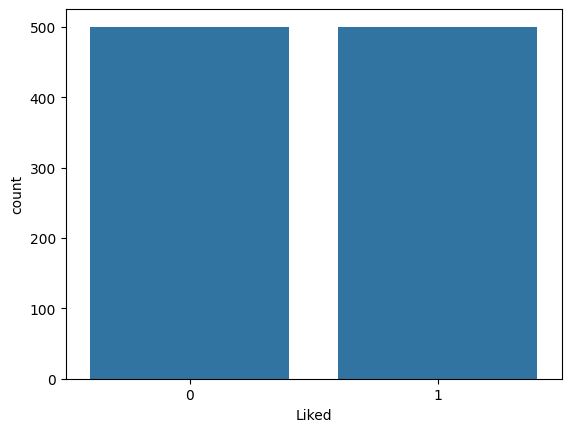

In [8]:
sns.countplot(x = reviews['Liked'])

In [9]:
reviews['Review Letter Count'] = reviews['Review'].apply(len)

In [10]:
reviews

,Review,Liked,Review Letter Count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [11]:
reviews['Review Letter Count'].max()

149

In [12]:
reviews.iloc[reviews['Review Letter Count'].idxmax()]['Review']

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

## Pre-processing Data (NLTK Text Data Cleaning)

In [13]:
import nltk # Natural Language Toolkit

In [14]:
# REMOVE PUNCTUATION
# import string
# string.punctuation

In [15]:
reviews['Review'][0] # the word 'this' is a stopword

'Wow... Loved this place.'

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords

In [18]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
s = reviews['Review'][0]
s

'Wow... Loved this place.'

In [20]:
import re
s = re.sub('[^a-zA-Z]', ' ', s)
s

'Wow    Loved this place '

In [21]:
s = s.lower()
s

'wow    loved this place '

In [22]:
s = s.split()
s

['wow', 'loved', 'this', 'place']

In [23]:
temp = []
for word in s:
    if word not in stopwords.words('english'):
        temp.append(word)
print(temp)

['wow', 'loved', 'place']


In [24]:
s = [word for word in s if word not in stopwords.words('english')]
s

['wow', 'loved', 'place']

In [25]:
s = ' '.join(s)
s

'wow loved place'

In [26]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
s = ps.stem(s)
s

'wow loved plac'

In [27]:
# Bring it all together

corpus = []
pstem = PorterStemmer()

for i in range(len(reviews)):
    sentence = re.sub('[^a-zA-Z]', ' ', reviews['Review'][i])
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [pstem.stem(word) for word in sentence if word not in stopwords.words('english')]
    sentence = ' '.join(sentence)

    corpus.append(sentence)

# print(corpus)

In [28]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv = CountVectorizer(max_features=2000)

In [31]:
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
X.shape

(1000, 1565)

In [33]:
y = reviews['Liked']
y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Training & Building

In [35]:
from sklearn.naive_bayes import MultinomialNB # Try GaussianNB

In [36]:
clf = MultinomialNB()

In [37]:
clf.fit(X_train, y_train)

MultinomialNB()

## Model Prediction

In [38]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,

## Model Evaluation

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [40]:
print(accuracy_score(y_test, y_pred))

0.7575757575757576


In [41]:
print(confusion_matrix(y_test, y_pred))

[[129  44]
 [ 36 121]]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       173
           1       0.73      0.77      0.75       157

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



## Model Deployment & Production

In [43]:
import joblib

In [44]:
joblib.dump(clf, 'reviews.pkl')

['reviews.pkl']

==========

# THANK YOU!